In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to train folder
train_folder = r"C:\Users\HP\Downloads\2021.naacl-main.472.OptionalSupplementaryData\QMSum\ALL\train"

all_data = []

# Loop through all JSON files in the folder
for filename in os.listdir(train_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(train_folder, filename)
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)
            all_data.append(data)

# Flatten the list if needed (depends on JSON structure)

flat_data = []
for item in all_data:
    if isinstance(item, list):
        flat_data.extend(item)
    else:
        flat_data.append(item)

# Convert to DataFrame
train_df = pd.DataFrame(flat_data)
train_df.head()


,topic_list,general_query_list,specific_query_list,meeting_transcripts
0,[{'topic': 'Current XML format to link up diff...,"[{'query': 'Summarize the whole meeting', 'ans...",[{'query': 'Summarize the discussion about the...,"[{'speaker': 'Grad C', 'content': 'Yeah , we h..."
1,[{'topic': 'Details about setting up the wizar...,"[{'query': 'Summarize the meeting', 'answer': ...",[{'query': 'Summarize the details about settin...,"[{'speaker': 'Grad A', 'content': 'Hey , you '..."
2,"[{'topic': 'Data collection', 'relevant_text_s...","[{'query': 'Summarize the meeting.', 'answer':...",[{'query': 'What was the advantage of using No...,"[{'speaker': 'Grad A', 'content': 'Yeah , I th..."
3,[{'topic': 'Introducing Fey and discussing par...,"[{'query': 'Summarize the meeting', 'answer': ...",[{'query': 'Summarize the discussion about cap...,"[{'speaker': 'Grad G', 'content': 'Time .'}, {..."
4,"[{'topic': 'SmartKom architecture', 'relevant_...",[{'query': 'What was discussed in the meeting?...,[{'query': 'Summarize what was said on SmartKo...,"[{'speaker': 'Grad C', 'content': 'Hmm . Testi..."


In [3]:
# Check the first row in your DataFrame
sample = train_df.iloc[0]
print(sample.keys())  # Shows top-level keys
print(sample['meeting_transcripts'])  # Inspect how transcripts are stored


Index(['topic_list', 'general_query_list', 'specific_query_list',
       'meeting_transcripts'],
      dtype='object')
[{'speaker': 'Grad C', 'content': 'Yeah , we had a long discussion about how much w how easy we want to make it for people to bleep things out . So {disfmarker} Morgan wants to make it hard .'}, {'speaker': 'PhD D', 'content': "It {disfmarker} it doesn't {disfmarker}"}, {'speaker': 'Grad C', 'content': "Did {disfmarker} did {disfmarker} did it {disfmarker} ? I didn't even check yesterday whether it was moving ."}, {'speaker': 'PhD D', 'content': "It didn't move yesterday either when I started it ."}, {'speaker': 'Grad C', 'content': 'So .'}, {'speaker': 'PhD D', 'content': "So I don't know if it doesn't like both of us {disfmarker}"}, {'speaker': 'Grad C', 'content': 'Channel three ? Channel three ?'}, {'speaker': 'PhD D', 'content': 'You know , I discovered something yesterday on these , um , wireless ones .'}, {'speaker': 'Grad B', 'content': 'Channel two .'}, {'spea

In [4]:
# Inspect the first query of the first meeting
train_df['general_query_list'][0][0].keys()


dict_keys(['query', 'answer'])

In [5]:
# Function to get all answers (summaries) for a meeting
def get_all_summaries(row):
    summaries = []
    for qlist in ['general_query_list', 'specific_query_list']:
        for q in row[qlist]:
            summaries.append(q['answer'])  # using 'answer' key
    return summaries

# Apply function
train_df['all_summaries'] = train_df.apply(get_all_summaries, axis=1)

# Computing total summary length per meeting (sum of words across all answers)
train_df['summary_len'] = train_df['all_summaries'].apply(
    lambda x: sum(len(s.split()) for s in x)
)

# Compute transcript length
train_df['transcript_len'] = train_df['meeting_transcripts'].apply(
    lambda x: sum(len(utt['content'].split()) for utt in x)
)

# Quick descriptive statistics
train_df[['transcript_len', 'summary_len']].describe()


,transcript_len,summary_len
count,162.000000,162.000000
mean,8928.845679,547.944444
std,4807.679099,286.980538
min,942.000000,216.000000
25%,5452.750000,370.500000
50%,8218.500000,471.000000
75%,11971.250000,600.500000
max,23675.000000,1792.000000


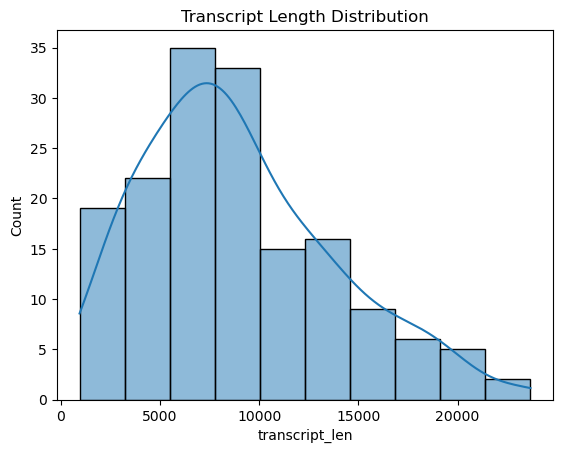

In [6]:
sns.histplot(train_df['transcript_len'], kde=True)
plt.title("Transcript Length Distribution")
plt.show()

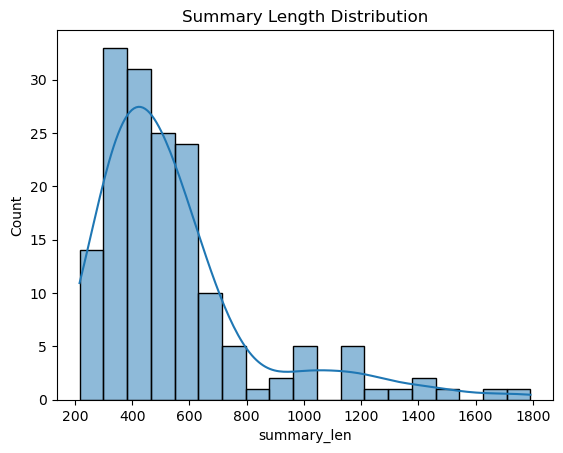

In [7]:
sns.histplot(train_df['summary_len'], kde=True)
plt.title("Summary Length Distribution")
plt.show()

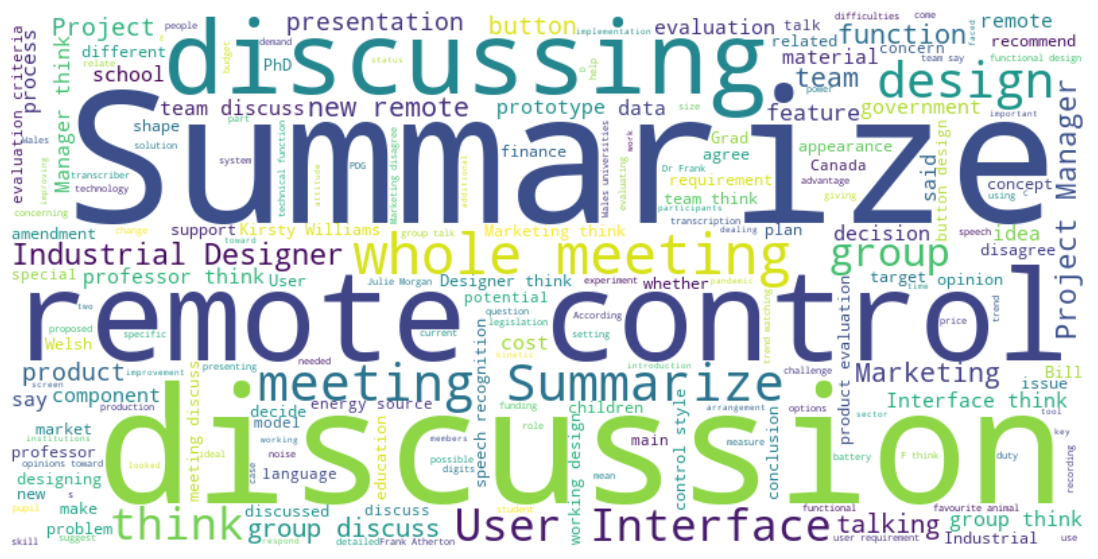

In [8]:
from wordcloud import WordCloud

# Function to get all queries from a row
def get_all_queries(row):
    queries = []
    for qlist in ['general_query_list', 'specific_query_list']:
        for q in row[qlist]:
            queries.append(q['query'])
    return queries

# Create a new column with all queries per meeting
train_df['all_queries'] = train_df.apply(get_all_queries, axis=1)

# Flatten all queries into a single string
all_text = " ".join([q for sublist in train_df['all_queries'] for q in sublist])

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

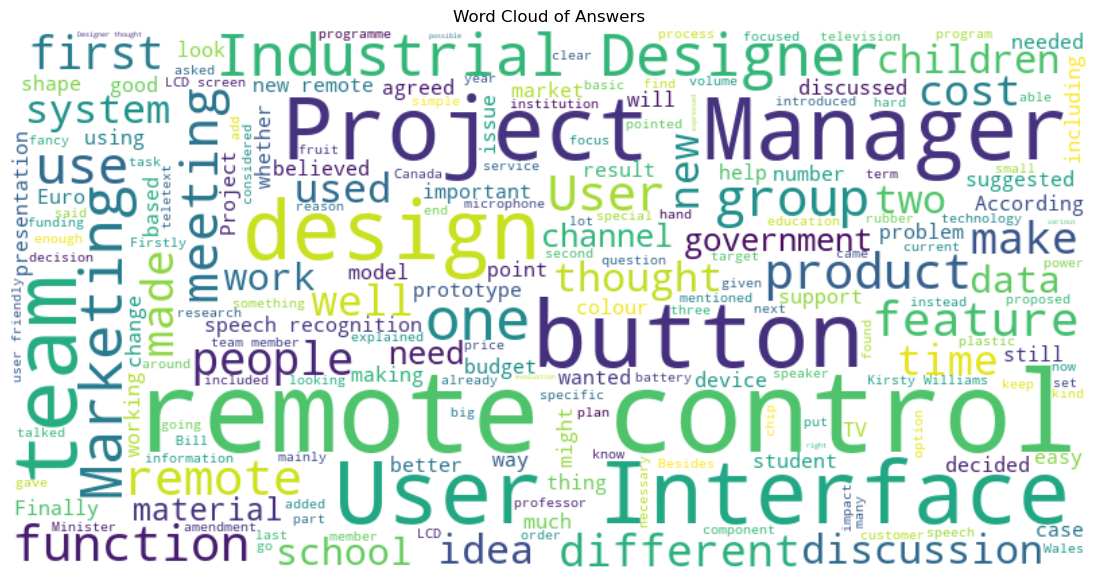

In [9]:
# Function to get all answers from a row
def get_all_answers(row):
    answers = []
    for qlist in ['general_query_list', 'specific_query_list']:
        for q in row[qlist]:
            answers.append(q['answer'])
    return answers

# Create a new column with all answers per meeting
train_df['all_answers'] = train_df.apply(get_all_answers, axis=1)

# Flatten all answers into a single string
all_answers_text = " ".join([a for sublist in train_df['all_answers'] for a in sublist])

# Generate word cloud for answers
wc_answers = WordCloud(width=800, height=400, background_color="white").generate(all_answers_text)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wc_answers, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Answers")
plt.show()


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   topic_list           162 non-null    object
 1   general_query_list   162 non-null    object
 2   specific_query_list  162 non-null    object
 3   meeting_transcripts  162 non-null    object
 4   all_summaries        162 non-null    object
 5   summary_len          162 non-null    int64 
 6   transcript_len       162 non-null    int64 
 7   all_queries          162 non-null    object
 8   all_answers          162 non-null    object
dtypes: int64(2), object(7)
memory usage: 11.5+ KB


In [11]:
train_df.isnull().sum()

topic_list             0
general_query_list     0
specific_query_list    0
meeting_transcripts    0
all_summaries          0
summary_len            0
transcript_len         0
all_queries            0
all_answers            0
dtype: int64

In [12]:
# Number of words in transcript per meeting
train_df['transcript_len'] = train_df['meeting_transcripts'].apply(
    lambda x: sum(len(utt['content'].split()) for utt in x)
)

In [13]:
# Number of words in all answers
train_df['answer_len'] = train_df['all_answers'].apply(
    lambda x: sum(len(a.split()) for a in x)
)

<Axes: xlabel='transcript_len', ylabel='Count'>

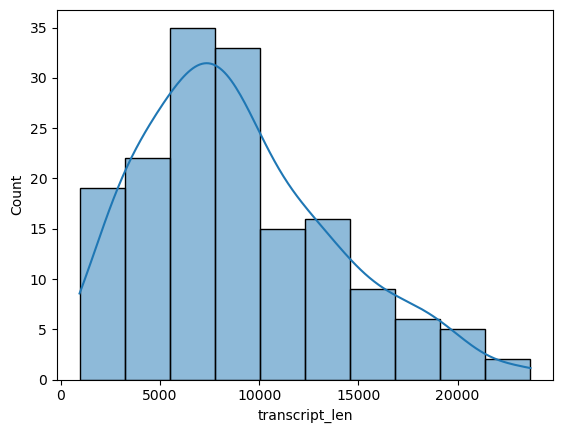

In [14]:
sns.histplot(train_df['transcript_len'], kde=True)

<Axes: xlabel='answer_len', ylabel='Count'>

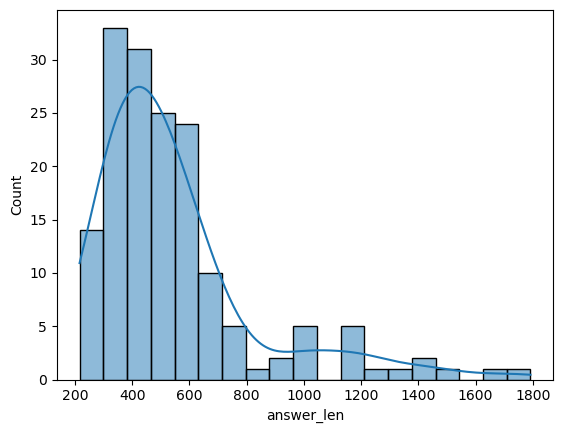

In [15]:
sns.histplot(train_df['answer_len'], kde=True)

In [16]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

all_queries = [q['query'] for row in train_df.itertuples() for qlist in ['general_query_list','specific_query_list'] for q in getattr(row, qlist)]
words = [word.lower() for q in all_queries for word in q.split() if word.lower() not in stop_words]
Counter(words).most_common(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('summarize', 431),
 ('think', 244),
 ('discussion', 229),
 ('remote', 226),
 ('discussing', 143),
 ('group', 133),
 ('meeting.', 128),
 ('whole', 127),
 ('discuss', 96),
 ('user', 95),
 ('team', 91),
 ('project', 88),
 ('control', 86),
 ('industrial', 78),
 ('control?', 76),
 ('new', 74),
 ('interface', 73),
 ('marketing', 71),
 ('design', 70),
 ('meeting', 63)]

In [17]:
speakers = [utt['speaker'] for row in train_df['meeting_transcripts'] for utt in row]
Counter(speakers).most_common(10)

[('Project Manager', 14988),
 ('Marketing', 12362),
 ('User Interface', 11411),
 ('Industrial Designer', 11158),
 ('Professor B', 2891),
 ('PhD E', 2242),
 ('PhD B', 2149),
 ('PhD A', 2102),
 ('Grad A', 1952),
 ('PhD D', 1832)]